# 第 9 章 模型设定和数据问题的深入探讨 

## C9.1【RESET；异方差-稳健 F 检验】 

（1）在计算机习题C7.5 所估计的模型中，应用方程（9.3）中的RESET。此方程中有函数形式误设的证据吗？ 

（2）计算一个异方差-稳健形式的 RESET。你在第（1）部分的结论改变了吗？ 


In [1]:
library(wooldridge)
library(haven)
library(car)

Loading required package: carData


In [2]:
CEOSAL1 <- read_dta("C:/Users/bradl/SRM/data/CEOSAL1.DTA")
attach(CEOSAL1) 

In [3]:
CEOSAL1<-within(CEOSAL1,{       
    rosneg<-NA       
    rosneg [ros<0] <- 1       
    rosneg [ros>=0] <- 0 })   
fit1<-lm(log(salary)~log(sales)+roe+CEOSAL1$rosneg) #拟合上述模型 
a<-fitted(fit1) #将OLS 拟合值保存在 a 中 
fit2<-lm(log(salary)~log(sales)+roe+CEOSAL1$rosneg+I(a^2)+I(a^3)) 
myH0 <- c("I(a^2)","I(a^3)") #用联合检验所涉及的变量组成向量，构成H0。 
linearHypothesis(fit2,myH0) 

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
205,46.93196,NA,NA,NA,NA
203,46.32335,2,0.608609,1.333535,0.2658426


In [4]:
linearHypothesis(fit2, myH0, vcov=hccm(fit2,type="hc0")) 
detach(CEOSAL1) 

Res.Df,Df,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>
205,NA,NA,NA
203,2,2.23875,0.1092171


异方差-稳健的F检验的 p 值为0.1092，比（1）中有更强的证据支持函数形式存在误设。但仍不再10%水平上显著。 

## C9.2【代理变量；F 检验】 本题使用WAGE2.RAW 中的数据。 

（1）在例9.3 中，用变量KWW（“工作领域内知识”测试分数）取代IQ 作为能力的代理变量。 在此情形下，估计的教育回报是多少？ 

（2）现在用IQ 和KWW 一起作为代理变量。所估计的教育回报会怎样？ 

（3）在第（2）部分中，IQ 和KWW 是个别显著的吗？它们联合显著吗？ 

In [5]:
WAGE2 <- read_dta("C:/Users/bradl/SRM/data/WAGE2.DTA")
attach(WAGE2) 

In [6]:
fit1<-lm(log(wage)~educ+exper+tenure+married+south+urban+black+KWW) #拟合上述模型 
summary(fit1) 


Call:
lm(formula = log(wage) ~ educ + exper + tenure + married + south + 
    urban + black + KWW)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.04494 -0.21931 -0.00048  0.24163  1.26464 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.358797   0.113600  47.172  < 2e-16 ***
educ         0.057628   0.006838   8.428  < 2e-16 ***
exper        0.012228   0.003241   3.773 0.000172 ***
tenure       0.011072   0.002456   4.507 7.40e-06 ***
married      0.189461   0.039077   4.848 1.46e-06 ***
south       -0.091601   0.026156  -3.502 0.000484 ***
urban        0.175545   0.027032   6.494 1.36e-10 ***
black       -0.164267   0.038530  -4.263 2.22e-05 ***
KWW          0.005028   0.001819   2.764 0.005820 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3642 on 926 degrees of freedom
Multiple R-squared:  0.2587,	Adjusted R-squared:  0.2523 
F-statistic: 40.39 on 8 and 926 DF,  p-value: < 2.2e-16


In [7]:
fit2<-lm(log(wage)~educ+exper+tenure+married+south+urban+black+KWW+IQ) #拟合上述模型 
summary(fit2) 


Call:
lm(formula = log(wage) ~ educ + exper + tenure + married + south + 
    urban + black + KWW + IQ)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.05704 -0.21621  0.00824  0.23725  1.24895 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.175644   0.127776  40.506  < 2e-16 ***
educ         0.049837   0.007262   6.863 1.24e-11 ***
exper        0.012752   0.003231   3.947 8.51e-05 ***
tenure       0.010925   0.002446   4.467 8.92e-06 ***
married      0.192145   0.038909   4.938 9.35e-07 ***
south       -0.082029   0.026222  -3.128  0.00181 ** 
urban        0.175823   0.026910   6.534 1.06e-10 ***
black       -0.130399   0.039901  -3.268  0.00112 ** 
KWW          0.003826   0.001852   2.066  0.03913 *  
IQ           0.003118   0.001013   3.079  0.00214 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3625 on 925 degrees of freedom
Multiple R-squared:  0.2662,	Adjusted R-squared:  0.2591

In [8]:
myH0 <- c("KWW","IQ") 
linearHypothesis(fit2,myH0) 
detach(WAGE2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
927,123.8185,NA,NA,NA,NA
925,121.5595,2,2.259033,8.594991,0.0002002182


## C9.3【异方差-稳健标准误】 
本题使用 JTRAIN.RAW 中的数据。 
（1）考虑简单回归模型 $log(scrap)=\beta_0+\beta_1grant+\mu$ 其中，scrap 表示企业的废品率，grant表示是否得到工作培训津贴的一个虚拟变量。你能想到$\mu$中的无法观测因素可能会与grant相关的原因吗？ 

（2）利用1988 年的数据估计这个简单的回归模型。（你应该有54个观测。）得到工作培训 津贴显著地降低了企业的废品率吗？ 

（3）现在增加一个解释变量$log(scrap_{87})$。这将如何改变grant 的估计影响？解释grant的系数。相对于单侧对立假设$H_1:\beta_{grant}<0$，它在5%的显著性水平上统计显著吗？ 

（4）相对双侧对立假设，检验$log(scrap_{87})$的参数为1的虚拟假设。报告检验的p值。 

（5）利用异方差-稳健标准误，重复第（3）步和第（4）步，并简要讨论任何明显的差异。 

In [9]:
JTRAIN <- read_dta("C:/Users/bradl/SRM/data/JTRAIN.DTA")
attach(JTRAIN) 

In [10]:
fit1<-lm(log(scrap)~grant, subset=(year==1988))  #拟合上述模型 
summary(fit1) 


Call:
lm(formula = log(scrap) ~ grant, subset = (year == 1988))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4043 -0.9536 -0.0465  0.9636  2.8103 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.4085     0.2406   1.698   0.0954 .
grant         0.0566     0.4056   0.140   0.8895  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.423 on 52 degrees of freedom
  (103 observations deleted due to missingness)
Multiple R-squared:  0.0003744,	Adjusted R-squared:  -0.01885 
F-statistic: 0.01948 on 1 and 52 DF,  p-value: 0.8895


In [11]:
fit2<-lm(log(scrap)~grant+lscrap_1, subset=(year==1988))  #拟合上述模型，其中lscrap_1 是 log(scrap)的滞后一期值。
summary(fit2) 


Call:
lm(formula = log(scrap) ~ grant + lscrap_1, subset = (year == 
    1988))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9146 -0.1763  0.0057  0.2308  1.5991 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02124    0.08910   0.238   0.8126    
grant       -0.25397    0.14703  -1.727   0.0902 .  
lscrap_1     0.83116    0.04444  18.701   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5127 on 51 degrees of freedom
  (103 observations deleted due to missingness)
Multiple R-squared:  0.8728,	Adjusted R-squared:  0.8678 
F-statistic: 174.9 on 2 and 51 DF,  p-value: < 2.2e-16


In [12]:
(0.83116-1)/0.04444
pt(-3.79928, 52) 

[1] -3.79928

[1] 0.000190901

 计算t值-3.79928对应52个自由度的p值，结果为0.000190901，在单侧1%上显著。则双侧p值为 2*0.000190901，结果为 0.000381802，在1%水平上显著。 

In [13]:
library(lmtest)
coeftest(fit2, vcov=hccm(fit2,type = "hc0")) 

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  0.021237   0.097032  0.2189   0.82763    
grant       -0.253970   0.142249 -1.7854   0.08014 .  
lscrap_1     0.831161   0.071469 11.6297 5.862e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## C9.4【异常值；对单个观测引进虚拟变量】 
本题使用INFMRT.RAW 中1990 年的数据。 

（1）重新估计方程（9.43），但现在对哥伦比亚特区这个观测引进一个虚拟变量（记为DC）。解释DC的系数，并评论其大小和显著性。 

（2）将第（1）步所得到的估计值和标准误与方程（9.44）中的估计值和标准误相比较。根据这种对单个观测引进一个虚拟变量的做法，你得到什么结论？ 
 

In [14]:
attach(infmrt) 

The following object is masked from JTRAIN:

    year



In [15]:
fit<-lm(infmort~log(pcinc)+log(physic)+log(popul)+DC, subset=(year==1990))  #拟合上述模型，并采 用1990 年的数据
summary(fit) 


Call:
lm(formula = infmort ~ log(pcinc) + log(physic) + log(popul) + 
    DC, subset = (year == 1990))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4964 -0.8076  0.0000  0.9358  2.6077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.9548    12.4195   1.929  0.05994 .  
log(pcinc)   -0.5669     1.6412  -0.345  0.73135    
log(physic)  -2.7418     1.1908  -2.303  0.02588 *  
log(popul)    0.6292     0.1911   3.293  0.00191 ** 
DC           16.0350     1.7692   9.064 8.43e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.246 on 46 degrees of freedom
Multiple R-squared:  0.691,	Adjusted R-squared:  0.6641 
F-statistic: 25.71 on 4 and 46 DF,  p-value: 3.146e-11


DC 的系数表示即便有一个州和哥伦比亚特区的人均收入（pcinc）、每十万人拥有的医生人数 （physic）、人口总数（popul）相同，哥伦比亚特区的新生儿死亡人数还是要多16.035。且此 系数在1%水平上显著。 

In [16]:
detach(infmrt) 

## C9.5【异常观测；最小绝对离差】 
利用RDCHEM.RAW 中的数据，进一步考察异常数据对OLS 估计值的影响，并看LAD 如何对异常数据缺乏敏感性。模型是 
$$rdintens=\beta_0+\beta_1sales+\beta_2sales^2+\beta_3profmarg+\mu$$
其中你应该首先定义 sales 的度量单位为10 亿美元，从而使得估计值更容易解释。 

（1）在包含和不包含年销售额近400 亿美元的企业的情况下，用OLS 估计上述方程。讨论估计系数的明显差别。 

（2）再次在包含和不包含最大企业的情形下，用LAD 估计同一方程。讨论估计系数的重要差别。 

（3）基于第（1）部分和第（2）部分的结论，你认为OLS 和 LAD 哪个方法对异常观测更有弹 性余地？ 
 

In [17]:
RDCHEM <- read_dta("C:/Users/bradl/SRM/data/RDCHEM.DTA")
RDCHEM$salesb<-RDCHEM$sales/1000 #定义salesb 的单位为 billion（sales 的单位为 million）。 
attach(RDCHEM) 

The following objects are masked from JTRAIN:

    lsales, sales



In [18]:
fit1<-lm(rdintens~salesb+I(salesb^2)+profmarg) #拟合上述模型 
summary(fit1) 


Call:
lm(formula = rdintens ~ salesb + I(salesb^2) + profmarg)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0371 -1.1238 -0.4547  0.7165  5.8522 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.058967   0.626269   3.288  0.00272 **
salesb       0.316611   0.138854   2.280  0.03041 * 
I(salesb^2) -0.007390   0.003716  -1.989  0.05657 . 
profmarg     0.053322   0.044210   1.206  0.23787   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.774 on 28 degrees of freedom
Multiple R-squared:  0.1905,	Adjusted R-squared:  0.1037 
F-statistic: 2.196 on 3 and 28 DF,  p-value: 0.1107


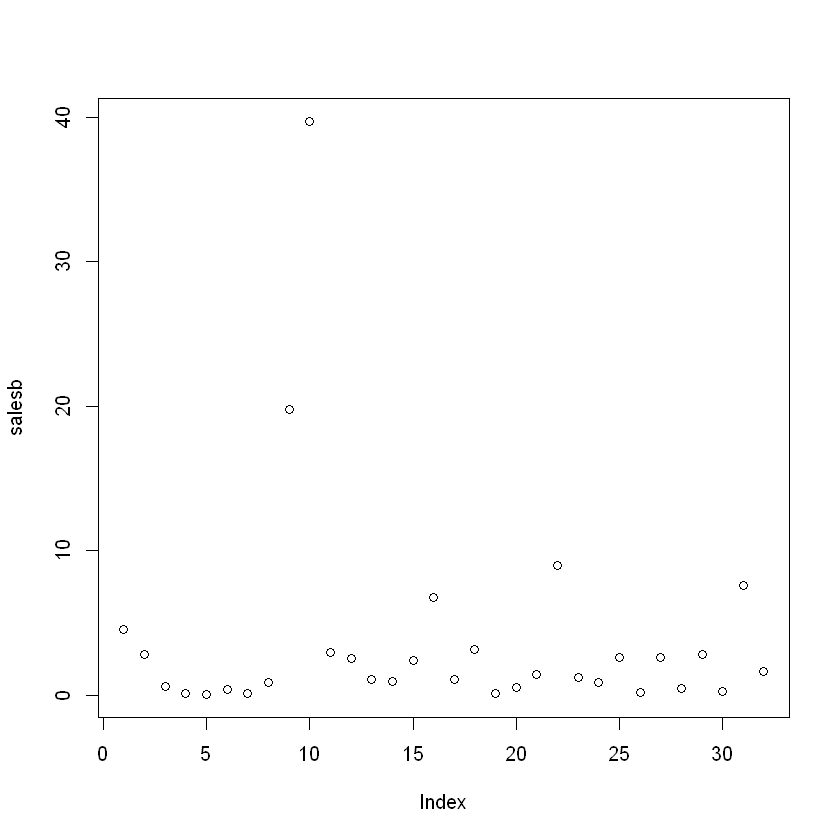

In [19]:
plot(salesb) 

In [20]:
a<-subset(RDCHEM, salesb<35) #排除年销售额近400亿美元的企业 
fit2<-lm(rdintens~salesb+I(salesb^2)+profmarg, data=a) #拟合上述模型 
summary(fit2) 


Call:
lm(formula = rdintens ~ salesb + I(salesb^2) + profmarg, data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0843 -1.1354 -0.5505  0.7570  5.7783 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.98352    0.71763   2.764   0.0102 *
salesb       0.36062    0.23887   1.510   0.1427  
I(salesb^2) -0.01025    0.01308  -0.784   0.4401  
profmarg     0.05528    0.04579   1.207   0.2378  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.805 on 27 degrees of freedom
Multiple R-squared:  0.1912,	Adjusted R-squared:  0.1013 
F-statistic: 2.128 on 3 and 27 DF,  p-value: 0.1201


通过比较可以发现当最大sales 值的公司留在样本中时，二次项是显著的，即便其经济学意义 没有排除最大值公司得到的回归大。这是因为当我们保留最大值在样本中时，会增加sales 和 slaes2的方差，而引起 OLS 系数的方差变小。sales2的系数在10%水平上显著，通过图9.1（第 309 页），我们可以发现最大值的 rdintems 相对较小，这也是sales2项显著的原因。因此，把最大 sales 公司保留使得拟合结果更好。 

In [21]:
library(quantreg) #载入最小绝对离差所需的包 
lad1<-rq(rdintens~salesb+I(salesb^2)+profmarg) #拟合上述模型 
summary(lad1)

Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve




Call: rq(formula = rdintens ~ salesb + I(salesb^2) + profmarg)

tau: [1] 0.5

Coefficients:
            coefficients lower bd upper bd
(Intercept)  1.40428      0.87031  2.66628
salesb       0.26346     -0.13508  0.75753
I(salesb^2) -0.00600     -0.01679  0.00344
profmarg     0.11400      0.01376  0.16427

In [22]:
lad2<-rq(rdintens~salesb+I(salesb^2)+profmarg, data=a) #拟合上述模型 
summary(lad2) 


Call: rq(formula = rdintens ~ salesb + I(salesb^2) + profmarg, data = a)

tau: [1] 0.5

Coefficients:
            coefficients lower bd upper bd
(Intercept)  2.61047      0.58936  2.81404
salesb      -0.22364     -0.23542  0.87607
I(salesb^2)  0.01681     -0.03201  0.02883
profmarg     0.07594      0.00578  0.16392

In [23]:
library(stargazer) #载入stargazer 的包 
stargazer(lad1, lad2, type="text") 


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




                 Dependent variable:     
             ----------------------------
                       rdintens          
                  (1)            (2)     
-----------------------------------------
salesb           0.263         -0.224    
                (1.982)        (3.925)   
                                         
I(salesb2)       -0.006         0.017    
                (0.144)        (0.580)   
                                         
profmarg         0.114          0.076    
                (0.072)        (0.045)   
                                         
Constant         1.404          2.610    
                (2.722)        (2.795)   
                                         
-----------------------------------------
Observations       32            31      
Note:         *p<0.1; **p<0.05; ***p<0.01


## C9.6【异常观测】 
去掉例4.10 中教师津贴低于薪水1%的学校，重新做这个例子。

（1）这样做将减少多少个观测？ 

（2）去掉这些观测对所估计的替代关系有重要影响吗？ 

In [24]:
MEAP93 <- read_dta("C:/Users/bradl/SRM/data/MEAP93.DTA")
attach(MEAP93) 

The following object is masked from package:wooldridge:

    benefits



In [25]:
a<-subset(MEAP93, benefits/salary>0.01)

In [26]:
fit<-lm(log(salary)~I(benefits/salary)+log(enroll)+log(staff)+droprate+gradrate, data=a) #拟合例4.10 所使用的模型
summary(fit) 


Call:
lm(formula = log(salary) ~ I(benefits/salary) + log(enroll) + 
    log(staff) + droprate + gradrate, data = a)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32815 -0.08856 -0.01817  0.06911  0.39963 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        10.7053486  0.2603520  41.119  < 2e-16 ***
I(benefits/salary) -0.4208110  0.1961619  -2.145   0.0325 *  
log(enroll)         0.0889273  0.0073969  12.022  < 2e-16 ***
log(staff)         -0.2190433  0.0499857  -4.382 1.51e-05 ***
droprate           -0.0002288  0.0016140  -0.142   0.8874    
gradrate            0.0009040  0.0006631   1.363   0.1736    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1241 on 398 degrees of freedom
Multiple R-squared:  0.3536,	Adjusted R-squared:  0.3455 
F-statistic: 43.55 on 5 and 398 DF,  p-value: < 2.2e-16


In [27]:
# benefits/salary 的系数从原先的-0.589 变成了-0.420811，这是一个较大的变化。
detach(MEAP93) 

## C9.7【异常观测】 

## C9.8【检验同一模型中两变量系数是否相等；函数形式设定；F 检验】 
本题使用TWOYEAR.RAW 中的数据。 

（1）变量stotal 是一项标准化测试变量，可用作无法观测的能力的代理变量。求 stotal 的样 本均值和标准差。 

（2）做jc 和univ 对stotal 的简单回归。两个大学教育变量都与stotal 统计相关吗？请解释。 

（3）在方程（4.17）中增加stotal，并检验二年制大专和四年制大学教育具有相同回报的假 设，对立假设是四年制大学的回报更高。你的结论与4.4 节中的结论有何区别？ 

（4）在第（3）部分估计的方程中增加stotal2。测试分数变量的二次项有必要吗？ 

（5）在第（3）部分的方程中增加stotal∙jc和stotal∙univ。这两项联合显著吗？ （6）你通过使用stotal 而控制能力变量的最终模型是什么？说明你的理由。 

In [28]:
attach(twoyear) 

In [29]:
mean(stotal) 
sd(stotal) 

[1] 0.04748291

[1] 0.8535441

In [30]:
fit1<-lm(jc~stotal) 
summary(fit1) 


Call:
lm(formula = jc ~ stotal)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3633 -0.3424 -0.3384 -0.3113  3.5196 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.338364   0.009403  35.983   <2e-16 ***
stotal      0.011177   0.011001   1.016     0.31    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7721 on 6761 degrees of freedom
Multiple R-squared:  0.0001527,	Adjusted R-squared:  4.767e-06 
F-statistic: 1.032 on 1 and 6761 DF,  p-value: 0.3097


In [31]:
fit2<-lm(univ~stotal) 
summary(fit2) 


Call:
lm(formula = univ ~ stotal)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4319 -1.8707 -0.4968  1.6909  7.8927 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.87073    0.02520   74.25   <2e-16 ***
stotal       1.16968    0.02948   39.68   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.069 on 6761 degrees of freedom
Multiple R-squared:  0.1889,	Adjusted R-squared:  0.1888 
F-statistic:  1575 on 1 and 6761 DF,  p-value: < 2.2e-16


In [32]:
fit3<-lm(lwage~jc+univ+exper+stotal)
summary(fit3) 


Call:
lm(formula = lwage ~ jc + univ + exper + stotal)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03314 -0.28033  0.00643  0.28361  1.86120 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.4952709  0.0212176  70.473  < 2e-16 ***
jc          0.0630514  0.0068214   9.243  < 2e-16 ***
univ        0.0686405  0.0025651  26.759  < 2e-16 ***
exper       0.0048773  0.0001571  31.036  < 2e-16 ***
stotal      0.0493766  0.0068096   7.251  4.6e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4285 on 6758 degrees of freedom
Multiple R-squared:  0.2284,	Adjusted R-squared:  0.228 
F-statistic: 500.2 on 4 and 6758 DF,  p-value: < 2.2e-16


为了检验二年制大专和四年制大学教育具有相同回报的假设，令totcall=jc+univ，并用totcall 取代univ，则jc 的系数就表示原方程中jc 和univ 的系数之差。（具体参见原书第 133 页4.25 式）。 

In [33]:
fit4<-lm(lwage~jc+I(jc+univ)+exper+stotal) 
summary(fit4) 


Call:
lm(formula = lwage ~ jc + I(jc + univ) + exper + stotal)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03314 -0.28033  0.00643  0.28361  1.86120 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.4952709  0.0212176  70.473  < 2e-16 ***
jc           -0.0055892  0.0069385  -0.806    0.421    
I(jc + univ)  0.0686405  0.0025651  26.759  < 2e-16 ***
exper         0.0048773  0.0001571  31.036  < 2e-16 ***
stotal        0.0493766  0.0068096   7.251  4.6e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4285 on 6758 degrees of freedom
Multiple R-squared:  0.2284,	Adjusted R-squared:  0.228 
F-statistic: 500.2 on 4 and 6758 DF,  p-value: < 2.2e-16


jc 的系数为-0.0055892，t 值为-0.806，并不显著，因此不支持四年制大学的回报更高。在4.4 节中（第133 页式4.27），在不添加stotal 这一变量的情况下，有证据表明四年制大学的回报 更高。 

In [34]:
fit5<-lm(lwage~jc+univ+exper+stotal+I(stotal^2)) 
summary(fit5) 


Call:
lm(formula = lwage ~ jc + univ + exper + stotal + I(stotal^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03146 -0.28128  0.00613  0.28455  1.85681 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.4939895  0.0214545  69.635  < 2e-16 ***
jc          0.0632092  0.0068330   9.251  < 2e-16 ***
univ        0.0685131  0.0025846  26.508  < 2e-16 ***
exper       0.0048776  0.0001572  31.036  < 2e-16 ***
stotal      0.0501562  0.0070778   7.086 1.52e-12 ***
I(stotal^2) 0.0019191  0.0047481   0.404    0.686    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4285 on 6757 degrees of freedom
Multiple R-squared:  0.2285,	Adjusted R-squared:  0.2279 
F-statistic: 400.2 on 5 and 6757 DF,  p-value: < 2.2e-16


In [35]:
fit6<-lm(lwage~jc+univ+exper+stotal+stotal:jc+stotal:univ) 
summary(fit6) 
myH0 <- c("jc:stotal","univ:stotal") 
linearHypothesis(fit6,myH0) #


Call:
lm(formula = lwage ~ jc + univ + exper + stotal + stotal:jc + 
    stotal:univ)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.04205 -0.28056  0.00637  0.28327  1.87669 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.4959235  0.0212432  70.419  < 2e-16 ***
jc           0.0636360  0.0068983   9.225  < 2e-16 ***
univ         0.0689706  0.0027439  25.136  < 2e-16 ***
exper        0.0048856  0.0001572  31.079  < 2e-16 ***
stotal       0.0582108  0.0087001   6.691  2.4e-11 ***
jc:stotal   -0.0168818  0.0092750  -1.820   0.0688 .  
univ:stotal -0.0026652  0.0029894  -0.892   0.3727    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4284 on 6756 degrees of freedom
Multiple R-squared:  0.2289,	Adjusted R-squared:  0.2282 
F-statistic: 334.2 on 6 and 6756 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6758,1240.889,NA,NA,NA,NA
6756,1240.170,2,0.7193649,1.959421,0.1410201


## C9.9【最小绝对离差；罗施-帕甘检验】 
在本题中，你将比较参与401（k）计划的资格对净金融资产影响的 OLS 和LAD 估计值。 模型是 $$nettfa=\beta_0+\beta_1inc+\beta_2inc^2+\beta_3age+\beta_4age^2+\beta_5male+\beta_6e401k+\mu$$ 

（1）利用401KSUBS.RAW 中的数据与OLS 估计这个方程，按照通常形式报告结果，并解释 e401k 的系数。 

（2）利用布罗施-帕甘检验，使用 OLS 残差检验异方差性。u 看上去独立于解释变量吗？ 

（3）用LAD 估计这个方程，并以对OLS 同样的方式报告结果。解释 LAD 的估计值𝛽𝛽6。 

（4）调和第（1）部分和第（3）部分的结论。 

In [36]:
X401ksubs <- read_dta("C:/Users/bradl/SRM/data/401ksubs.dta")
attach(X401ksubs) 

In [37]:
fit<-lm(nettfa~inc+I(inc^2)+age+I(age^2)+male+e401k) #拟合上述模型 
summary(fit) 


Call:
lm(formula = nettfa ~ inc + I(inc^2) + age + I(age^2) + male + 
    e401k)

Residuals:
    Min      1Q  Median      3Q     Max 
-516.00  -15.84   -3.19    6.09 1465.14 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.1977927  9.9922112   2.121 0.033912 *  
inc         -0.2702242  0.0746105  -3.622 0.000294 ***
I(inc^2)     0.0102160  0.0005871  17.400  < 2e-16 ***
age         -1.9397709  0.4834769  -4.012 6.06e-05 ***
I(age^2)     0.0345662  0.0055482   6.230 4.86e-10 ***
male         3.3690485  1.4858129   2.267 0.023384 *  
e401k        9.7134816  1.2771269   7.606 3.11e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 57.15 on 9268 degrees of freedom
Multiple R-squared:  0.2022,	Adjusted R-squared:  0.2017 
F-statistic: 391.6 on 6 and 9268 DF,  p-value: < 2.2e-16


In [38]:
bptest(fit) 


	studentized Breusch-Pagan test

data:  fit
BP = 346.64, df = 6, p-value < 2.2e-16


In [39]:
library(quantreg) #载入LAD 所需的包 
lad<-rq(nettfa~inc+I(inc^2)+age+I(age^2)+male+e401k) 
summary(lad)

Warning message in rq.fit.br(x, y, tau = tau, ...):
"Solution may be nonunique"


Call: rq(formula = nettfa ~ inc + I(inc^2) + age + I(age^2) + male + 
    e401k)

tau: [1] 0.5

Coefficients:
            Value    Std. Error t value  Pr(>|t|)
(Intercept) 12.49119  2.13691    5.84545  0.00000
inc         -0.26157  0.05015   -5.21528  0.00000
I(inc^2)     0.00709  0.00077    9.14805  0.00000
age         -0.72267  0.10893   -6.63439  0.00000
I(age^2)     0.01107  0.00146    7.56665  0.00000
male         1.01880  0.11786    8.64417  0.00000
e401k        3.73727  0.32050   11.66059  0.00000

第（1）部分和第（3）部分的结果并不矛盾。通过LAD 可以发现401k 资格对于nettfa（家庭 资产）的均值的效应（OLS）更大，而对nettfa 的中位数效应（LAD）较小。这是因为nettfa 的分布是有偏的，均值和中位数差异较大。因此，在OLS 中401k 资格对于资产较高的家庭有 更多的倾向，而LAD 则对极端值没有那么敏感。 

## C9.10【非随机样本】 
本题需要 JTRAIN2.RAW 和JTRAIN3.RAW 两个数据集。前者是工作培训实验的结果。而文件 JTRAIN3.RAW 包含了所观测到的数据，其中个人基本上是自己决定是否参加工作培训。数据集 包含同一时期的数据。 

（1）在数据集JTRAIN2.RAW 中，男人参加工作培训的比例是多大？在 JTRAIN3.RAW 中的比例 又是多大？你认为为什么存在这么大的差距？ 

（2）利用 JTRAIN2.RAW，做re78 对train 的简单回归。参与工作培训对真实工资的估计影响 有多大？ 

（3）现在，在第（2）部分的回归中增加控制变量re74，re75，educ，age，black 和 hisp。工 作培训对re78 的估计影响变化大吗？何以至此？（提示：这些都是实验数据。） 

（4）利用 JTRAIN3.RAW 中的数据做第（2）部分和第（3）部分的回归，只报告train 的估计 系数及其t 统计量。现在，控制额外因素的影响如何？为什么？ 

（5）定义avgre=(re74+re75)/2。求这两个数据集中的样本均值、标准差、最小值和最大值。 这些数据集代表了1978 年同样的总体吗？ 

（6）在数据集JTRAIN2.RAW 中，几乎96%的男性的avgre 低于10000 美元。只利用这些男性 的数据，做 r78 对train，re74，re75，educ，age，black 和 hisp 的回归，并报告培训估计值及其t 统计量。对JTRAIN3.RAW 也只利用avgre≤10 的男性做同样的回归。就这个低收入男性子样本而言，实验数据集和非实验数据集估计的培训效应有何差别？ 

（7）现在，只针对1974年和1975年失业的男性，利用每个数据集做re78 对train 的简单回归。培训的估计值又有何差别？ 

（8）利用你前面的回归结果，试讨论在比较实验估计值和非实验估计值的背后，拥有可比较总体的潜在重要性。 
 

In [40]:
JTRAIN2 <- read_dta("C:/Users/bradl/SRM/data/JTRAIN2.DTA")
attach(JTRAIN2) 

The following objects are masked from X401ksubs:

    age, agesq

The following object is masked from twoyear:

    black



In [41]:
attach(jtrain3) 

The following objects are masked from JTRAIN2:

    age, agesq, black, educ, hisp, married, re74, re75, re78, train,
    unem74, unem75, unem78

The following objects are masked from X401ksubs:

    age, agesq

The following object is masked from twoyear:

    black



In [42]:
mean(JTRAIN2$train) #查看男人参加工作培训的比例是多少，结果为0.4157303 
mean(jtrain3$train) #查看男人参加工作培训的比例是多少，结果为0.06915888 

[1] 0.4157303

[1] 0.06915888

In [43]:
fit1<-lm(re78~train, data= JTRAIN2) #拟合上述模型 
summary(fit1) 


Call:
lm(formula = re78 ~ train, data = JTRAIN2)

Residuals:
   Min     1Q Median     3Q    Max 
-6.349 -4.555 -1.829  2.917 53.959 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.5548     0.4080  11.162  < 2e-16 ***
train         1.7943     0.6329   2.835  0.00479 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.58 on 443 degrees of freedom
Multiple R-squared:  0.01782,	Adjusted R-squared:  0.01561 
F-statistic: 8.039 on 1 and 443 DF,  p-value: 0.004788


In [44]:
fit2<-lm(re78~train+re74+re75+educ+age+black+hisp, data= JTRAIN2) #拟合上述模型 
summary(fit2) 


Call:
lm(formula = re78 ~ train + re74 + re75 + educ + age + black + 
    hisp, data = JTRAIN2)

Residuals:
   Min     1Q Median     3Q    Max 
-9.890 -4.424 -1.661  3.012 54.113 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.67407    2.42272   0.278  0.78097   
train        1.68005    0.63086   2.663  0.00803 **
re74         0.08331    0.07653   1.089  0.27694   
re75         0.04677    0.13068   0.358  0.72062   
educ         0.40360    0.17485   2.308  0.02145 * 
age          0.05435    0.04382   1.240  0.21560   
black       -2.18007    1.15550  -1.887  0.05987 . 
hisp         0.14356    1.54092   0.093  0.92582   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.499 on 437 degrees of freedom
Multiple R-squared:  0.05476,	Adjusted R-squared:  0.03962 
F-statistic: 3.617 on 7 and 437 DF,  p-value: 0.0008396


In [45]:
fit3<-lm(re78~train, data= jtrain3) 
summary(fit3) 


Call:
lm(formula = re78 ~ train, data = jtrain3)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.554  -9.732  -0.866   7.705  99.620 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.5539     0.3036   70.98   <2e-16 ***
train       -15.2048     1.1546  -13.17   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.15 on 2673 degrees of freedom
Multiple R-squared:  0.06092,	Adjusted R-squared:  0.06057 
F-statistic: 173.4 on 1 and 2673 DF,  p-value: < 2.2e-16


In [46]:
fit4<-lm(re78~train+re74+re75+educ+age+black+hisp, data= jtrain3) 
summary(fit4) 


Call:
lm(formula = re78 ~ train + re74 + re75 + educ + age + black + 
    hisp, data = jtrain3)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.246  -4.355  -0.465   3.770 110.950 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.64755    1.30093   1.266 0.205465    
train        0.21323    0.85339   0.250 0.802716    
re74         0.28098    0.02790  10.071  < 2e-16 ***
re75         0.56929    0.02757  20.648  < 2e-16 ***
educ         0.52006    0.07522   6.914 5.89e-12 ***
age         -0.07507    0.02047  -3.667 0.000251 ***
black       -0.64771    0.49193  -1.317 0.188056    
hisp         2.20261    1.09279   2.016 0.043944 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.08 on 2667 degrees of freedom
Multiple R-squared:  0.5856,	Adjusted R-squared:  0.5845 
F-statistic: 538.4 on 7 and 2667 DF,  p-value: < 2.2e-16


在简单回归中，train 的系数为-15.20，这显然是有违背常识的。因此有理由怀疑存在样本选择 问题，接受工作培训并不是随机分配的，而是低收入工作者更愿意参与培训。在增加控制变量 后，train 的系数变为0.213。因此，在控制了诸如之前的收入和教育等因素后，train 的系数为 正但并不显著。 

In [47]:
avgre2<-(JTRAIN2$re74+JTRAIN2$re75)/2 #令 JTRAIN2 的avgre 为avgre2 
summary(avgre2) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.740   1.492  24.376 

In [48]:
sd(avgre2) 
avgre3<-(jtrain3$re74+jtrain3$re75)/2 

[1] 3.900095

In [49]:
sd(avgre3)

[1] 13.29345

In [50]:
JTRAIN2<-cbind(JTRAIN2, avgre2) #将avgre2 并到JTRAIN2 中 
a<-subset(JTRAIN2, avgre2<=10)  #将 JTRAIN2 中avgre2 低于10000 美元的样本保存在 a 中 
fit5<-lm(re78~train+re74+re75+educ+age+black+hisp, data=a) #拟合上述模型 
summary(fit5) 


Call:
lm(formula = re78 ~ train + re74 + re75 + educ + age + black + 
    hisp, data = a)

Residuals:
   Min     1Q Median     3Q    Max 
-8.217 -4.349 -1.750  3.044 53.977 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.73691    2.44601   0.710   0.4780  
train        1.58303    0.63245   2.503   0.0127 *
re74        -0.11676    0.12378  -0.943   0.3461  
re75         0.17321    0.18879   0.917   0.3594  
educ         0.35821    0.17591   2.036   0.0423 *
age          0.04400    0.04388   1.003   0.3166  
black       -2.38353    1.16779  -2.041   0.0419 *
hisp        -0.36940    1.55105  -0.238   0.8119  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.377 on 419 degrees of freedom
Multiple R-squared:  0.04627,	Adjusted R-squared:  0.03033 
F-statistic: 2.904 on 7 and 419 DF,  p-value: 0.005643


In [51]:
jtrain3<-cbind(jtrain3, avgre3) 
b<-subset(jtrain3, avgre3<=10)  
fit6<-lm(re78~train+re74+re75+educ+age+black+hisp, data=b) 
summary(fit6) 


Call:
lm(formula = re78 ~ train + re74 + re75 + educ + age + black + 
    hisp, data = b)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.673  -4.387  -1.751   2.804  60.545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.44801    2.14136   1.610  0.10777    
train        1.84445    0.89311   2.065  0.03924 *  
re74         0.31311    0.06919   4.525    7e-06 ***
re75         0.77435    0.07557  10.247  < 2e-16 ***
educ         0.32831    0.11034   2.975  0.00302 ** 
age         -0.08315    0.03068  -2.710  0.00688 ** 
black       -1.97331    0.72072  -2.738  0.00633 ** 
hisp        -1.10072    1.43184  -0.769  0.44228    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.962 on 757 degrees of freedom
Multiple R-squared:  0.2344,	Adjusted R-squared:  0.2273 
F-statistic: 33.11 on 7 and 757 DF,  p-value: < 2.2e-16


In [52]:
c<-subset(JTRAIN2, unem74==1 & unem75==1)  
fit7<-lm(re78~train, data=c) 
summary(fit7) 


Call:
lm(formula = re78 ~ train, data = c)

Residuals:
   Min     1Q Median     3Q    Max 
-5.955 -4.112 -1.921  3.091 28.145 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.1124     0.4300   9.563  < 2e-16 ***
train         1.8421     0.6892   2.673  0.00797 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.623 on 278 degrees of freedom
Multiple R-squared:  0.02505,	Adjusted R-squared:  0.02155 
F-statistic: 7.144 on 1 and 278 DF,  p-value: 0.007968


In [53]:
d<-subset(jtrain3, unem74==1 & unem75==1)  #将jtrain3 中1974 年和1975 年失业的样本保存在 d 中 
fit8<-lm(re78~train, data=d) #拟合上述回归 
summary(fit8) 


Call:
lm(formula = re78 ~ train, data = d)

Residuals:
   Min     1Q Median     3Q    Max 
-5.954 -2.151 -2.151 -0.299 64.347 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1512     0.5605   3.838 0.000155 ***
train         3.8033     0.8838   4.303 2.36e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.134 on 269 degrees of freedom
Multiple R-squared:  0.06441,	Adjusted R-squared:  0.06093 
F-statistic: 18.52 on 1 and 269 DF,  p-value: 2.356e-05


当用近似可比的样本时（例如在使用收入低于 10000 美元的样本时），实验估计值和非实验 估计值的结果比较接近。然而在使用总体抽样样本时，接受工作培训的效果并不显著。当然， 如果我们仅使用实验数据，也很难发现到底那一部分人群具有工作培训带来的效应。最后，对 于那些在接受培训前2 年都没有工作的人而言，培训带来的正面影响是无论对那个群体都是显 著的。

## C9.11【滞后因变量为代理变量；自定义虚拟变量】 
本题需要使用1993 年的数据，尽管你仍需要首先获得谋杀率的滞后值 mrdrte-1。 
（1）将mrdrte 对exec 和unem 进行回归。exec 的系数和 t 统计量是多少？这一回归能为死 刑的震慑作用提供什么证据吗？ 

（2）1993 年德克萨斯州报告的死刑人数有多少？（实际上，这是当年和过去两年死刑人数之和。）这个人数与其他州相比如何？在第（1）部分的回归中增加表示德克萨斯州的虚拟变 量。它的t统计量异常之大吗？由此看来，德克萨斯看上去是“异常数据”吗？ 

（3）在第（1）部分的回归中增加谋杀率的滞后变量。$\hat{\beta}_{exec}$及其统计显著性又有何变化？ 

（4）在第（3）部分的回归中，德克萨斯看上去是“异常数据”吗？在回归中去掉德克萨斯对$\hat{\beta}_{exec}$有何影响？

In [54]:
MURDER <- read_dta("C:/Users/bradl/SRM/data/MURDER.DTA")
attach(MURDER) 

The following object is masked from twoyear:

    id

The following object is masked from JTRAIN:

    year



In [55]:
a<-subset(MURDER, year==93) #将1993 年的样本保存在a 中
fit1<-lm(mrdrte~exec+unem, data=a) #拟合上述模型 
summary(fit1) 


Call:
lm(formula = mrdrte ~ exec + unem, data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.622  -3.148  -0.795   1.390  64.534 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -6.56864    6.31499  -1.040   0.3035  
exec         0.08492    0.28775   0.295   0.7692  
unem         2.41583    0.98098   2.463   0.0174 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.29 on 48 degrees of freedom
Multiple R-squared:  0.1152,	Adjusted R-squared:  0.07838 
F-statistic: 3.126 on 2 and 48 DF,  p-value: 0.05293


id,state,year,mrdrte,exec,unem,d90,d93,cmrdrte,cexec,cunem,cexec_1,cunem_1
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
44,TX,93,11.9,34,7,0,1,-2.200001,23,0.8000002,-11,-2.2


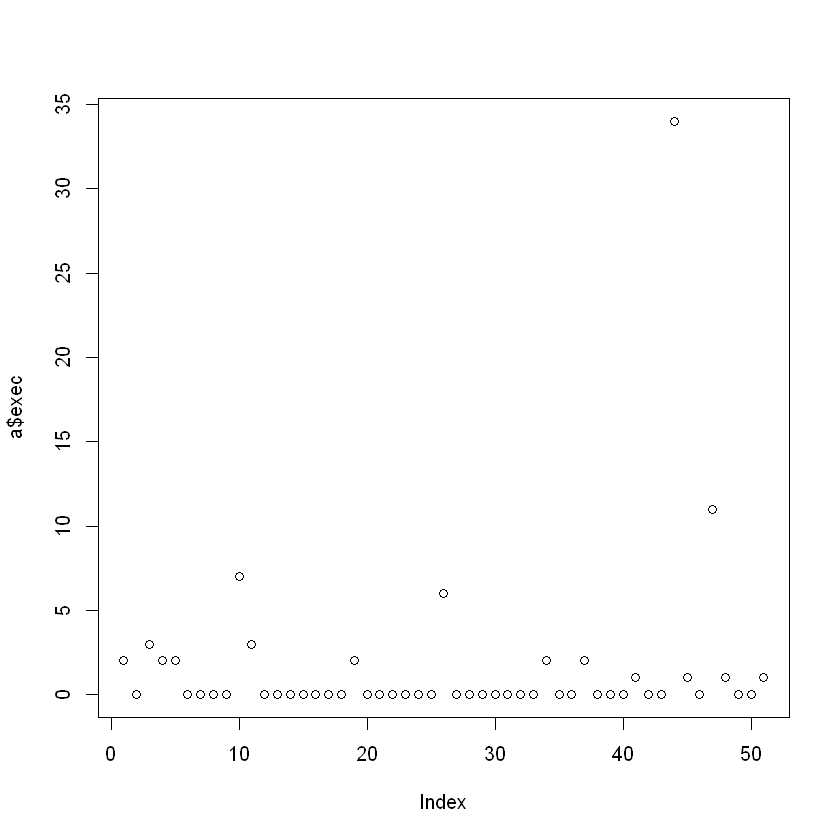

In [56]:
subset(a,state=="TX") #查看德克萨斯州样本的情况，发现1993 年共有34 人被执行死刑。 
plot(a$exec) #

In [57]:
a<-within(a,{       
    tx<-NA      
    tx[state=="TX"] <- 1      
    tx[state!="TX"] <- 0 })   #在a 中创建新变量tx，它在state=tx 时等于1，而在state≠tx 时等于0。 
fit2<-lm(mrdrte~exec+unem+tx, data=a) 
summary(fit2) 


Call:
lm(formula = mrdrte ~ exec + unem + tx, data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.522  -3.272  -0.527   1.221  64.668 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -6.8265     6.4256  -1.062    0.293  
exec          0.2949     0.7174   0.411    0.683  
unem          2.4304     0.9913   2.452    0.018 *
tx           -8.3123    25.9706  -0.320    0.750  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.39 on 47 degrees of freedom
Multiple R-squared:  0.1172,	Adjusted R-squared:  0.06082 
F-statistic: 2.079 on 3 and 47 DF,  p-value: 0.1156


In [58]:
b<-subset(MURDER, year==90) #将1990 年的样本保存在b 中 
a$lagmrdrte<-b$mrdrte #将b中的mrdrte 作为滞后变量保存在a 的lagmrdrte 中 
fit3<-lm(mrdrte~exec+unem+lagmrdrte, data=a) 
summary(fit3)


Call:
lm(formula = mrdrte ~ exec + unem + lagmrdrte, data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2885 -0.6815 -0.1636  0.7751  2.8604 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.88262    0.67585   1.306   0.1979    
exec        -0.07131    0.03045  -2.342   0.0235 *  
unem        -0.09034    0.11036  -0.819   0.4172    
lagmrdrte    1.00977    0.01546  65.319   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.085 on 47 degrees of freedom
Multiple R-squared:  0.9904,	Adjusted R-squared:  0.9897 
F-statistic:  1609 on 3 and 47 DF,  p-value: < 2.2e-16


In [59]:
fit4<-lm(mrdrte~exec+unem+lagmrdrte+tx, data=a) 
summary(fit4)


Call:
lm(formula = mrdrte ~ exec + unem + lagmrdrte + tx, data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2681 -0.6975 -0.1384  0.7950  2.8285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.84908    0.68800   1.234    0.223    
exec        -0.04540    0.07585  -0.599    0.552    
unem        -0.08794    0.11157  -0.788    0.435    
lagmrdrte    1.00953    0.01562  64.648   <2e-16 ***
tx          -1.02434    2.74135  -0.374    0.710    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.095 on 46 degrees of freedom
Multiple R-squared:  0.9904,	Adjusted R-squared:  0.9896 
F-statistic:  1185 on 4 and 46 DF,  p-value: < 2.2e-16


In [60]:
c<-subset(a, state!="TX") #将排除德克萨斯州之后的样本放入 c 中 
fit5<-lm(mrdrte~exec+unem+lagmrdrte, data=c)
summary(fit5) 


Call:
lm(formula = mrdrte ~ exec + unem + lagmrdrte, data = c)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2681 -0.7064 -0.1408  0.7993  2.8285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.84908    0.68800   1.234    0.223    
exec        -0.04540    0.07585  -0.599    0.552    
unem        -0.08794    0.11157  -0.788    0.435    
lagmrdrte    1.00953    0.01562  64.648   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.095 on 46 degrees of freedom
Multiple R-squared:  0.9904,	Adjusted R-squared:  0.9897 
F-statistic:  1577 on 3 and 46 DF,  p-value: < 2.2e-16


## C9.12【异常观测；最小绝对离差估计（LAD）；学生化残差；异方差-稳健标准误】
本题需要使用ELEM94_95 中的数据，也可参见计算机习题 C4.10。 

（1）利用所有数据，将 lavgsal 对bs，lenrol，lstaff 和lunch 进行回归。报告bs的系数及其常用标准误和异方差-稳健标准误。你对$\beta_{bs}$的经济显著性和统计显著性得到什么结论？ 

（2）显著去掉四个bs>0.5的观测，即平均福利（假设）占平均薪水50%以上的观测。bs 的系数又是多少？利用异方差-稳健标准误来判断，它在统计上显著吗？ 

（3）验证bs>0.5 的四个观测分别为 68、1127、1508 和1670。为它们各定义一个虚拟变量。（你可以称它们为d68、d1127、d1508 和d1670）把他们添加到第（1）部分的回归中，验 证其他变量的OLS系数以及标准误与第（2）部分中的结果相同。在5%的显著性水平上，这四个虚拟变量中哪个变量的t 统计量在统计上显著不等于 0？ 

（4）在这个数据集中，验证第（3）部分回归中具有最大学生化残差（该虚拟变量的t 统计量 最大）的数据点对OLS 估计值具有很大的影响。（即利用除去具有最大学生化残差的数据点 之外的所有观测进行 OLS 回归）依次去掉bs>0.5的每个观测都具有重要影响吗？ 

（5）即便在大样本中，就OLS 对单个观测的敏感性而言，你有何结论？ 

（6）在第（3）部分，验证LAD 估计量对包含这些观测不是很敏感。 

In [61]:
attach(elem94_95) 

The following objects are masked from JTRAIN:

    avgsal, lavgsal



In [62]:
fit1<-lm(lavgsal~bs+lenrol+lstaff+lunch) 
summary(fit1) 


Call:
lm(formula = lavgsal ~ bs + lenrol + lstaff + lunch)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92076 -0.11018 -0.00995  0.10614  0.58991 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.8314939  0.1097259 126.055  < 2e-16 ***
bs          -0.5161290  0.1097747  -4.702 2.77e-06 ***
lenrol      -0.0284092  0.0084560  -3.360 0.000796 ***
lstaff      -0.6906322  0.0183604 -37.615  < 2e-16 ***
lunch       -0.0007581  0.0001615  -4.695 2.87e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1668 on 1843 degrees of freedom
Multiple R-squared:  0.4882,	Adjusted R-squared:  0.487 
F-statistic: 439.4 on 4 and 1843 DF,  p-value: < 2.2e-16


In [63]:
coeftest(fit1, vcov=hccm(fit1,type = "hc0")) 


t test of coefficients:

               Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept) 13.83149386  0.16829430  82.1863 < 2.2e-16 ***
bs          -0.51612900  0.28293184  -1.8242   0.06828 .  
lenrol      -0.02840918  0.01201619  -2.3642   0.01817 *  
lstaff      -0.69063222  0.02074037 -33.2989 < 2.2e-16 ***
lunch       -0.00075805  0.00017427  -4.3498 1.437e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [64]:
a<-subset(elem94_95, bs<=0.5) #去掉四个bs>0.5 的观测，将其余观测保存在a 中 
fit2<-lm(lavgsal~bs+lenrol+lstaff+lunch, data=a) 
coeftest(fit2, vcov=hccm(fit2,type = "hc0")) 


t test of coefficients:

               Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept) 13.71011721  0.13874082  98.8182 < 2.2e-16 ***
bs          -0.18648056  0.14674536  -1.2708   0.20397    
lenrol      -0.02703742  0.01166844  -2.3171   0.02061 *  
lstaff      -0.69007030  0.02084028 -33.1123 < 2.2e-16 ***
lunch       -0.00080621  0.00017052  -4.7279 2.441e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [65]:
id<-c(1:1848) 
elem94_95<-cbind(elem94_95,id) #将elem94_95 与id 纵向合并 
b<-subset(elem94_95, bs>0.5)  #将bs>0.5 的观测保存在b 中 
b

,distid,schid,lunch,enrol,staff,exppp,avgsal,avgben,math4,story4,bs,lavgsal,lenrol,lstaff,id
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
68,9030,192,40.7,167,85.6,3584,24425,16108,67.9,71.4,0.6594882,10.103362,5.117994,4.449685,68
1127,63160,5783,3.6,411,115.1,5394,30304,17418,83.9,92.9,0.5747756,10.319035,6.018593,4.745801,1127
1508,82010,701,69.4,896,78.3,1353,9297,9295,41.2,48.5,0.9997849,9.137447,6.797940,4.360548,1508
1670,82040,5357,32.9,304,49.9,3532,50042,25134,57.6,55.9,0.5022581,10.820618,5.717028,3.910021,1670


In [66]:
elem94_95<-within(elem94_95,{       
    d68<-NA       
    d68[id==68] <- 1       
    d68[id!=68] <- 0 })
elem94_95<-within(elem94_95,{       
    d1127<-NA     
    d1127[id==1127] <- 1      
    d1127[id!=1127] <- 0 }) 
elem94_95<-within(elem94_95,{      
    d1508<-NA      
    d1508[id==1508] <- 1  
    d1508[id!=1508] <- 0 }) 
elem94_95<-within(elem94_95,{      
    d1670<-NA       
    d1670[id==1670] <- 1    
    d1670[id!=1670] <- 0 }) 
fit3<-lm(lavgsal~bs+lenrol+lstaff+lunch+ d68+ d1127+ d1508+ d1670, data= elem94_95) 
summary(fit3) 


Call:
lm(formula = lavgsal ~ bs + lenrol + lstaff + lunch + d68 + d1127 + 
    d1508 + d1670, data = elem94_95)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7320 -0.1114 -0.0088  0.1025  0.5941 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.7101172  0.1114002 123.071  < 2e-16 ***
bs          -0.1864806  0.1264279  -1.475  0.14038    
lenrol      -0.0270374  0.0083877  -3.223  0.00129 ** 
lstaff      -0.6900703  0.0182281 -37.858  < 2e-16 ***
lunch       -0.0008062  0.0001607  -5.017 5.75e-07 ***
d68         -0.2419878  0.1700900  -1.423  0.15499    
d1127        0.1566680  0.1682965   0.931  0.35202    
d1508       -1.1373953  0.1846071  -6.161 8.85e-10 ***
d1670        0.0834492  0.1666079   0.501  0.61652    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1651 on 1839 degrees of freedom
Multiple R-squared:  0.4994,	Adjusted R-squared:  0.4972 
F-statistic: 229.3 on 8 and 1839 DF,  p-val

In [68]:
studres<-rstudent(fit3) #将fit3 的学生化残差保存在studres 中 
summary(studres) #通过观察发现有 4 个样本的学生化残差为NA，因此在后续的代码中不能写 成用所有小于最大studres 的样本，这样会把这 4 个学生化残差为NA 的观测去掉 e
lem94_95<-cbind(elem94_95, studres) #将elem94_95 与学生化残差纵向合并 
c<-subset(elem94_95, studres==max(studres, na.rm = TRUE)) #保存在c 中 View(c) #查看c，发现其id 是1141 
d<-subset(elem94_95,id!=1141) #将排除了具有最大学生化残差的数据点之外的所有观测保存在 d 中 
fit4<-lm(lavgsal~bs+lenrol+lstaff+lunch+ d68+ d1127+ d1508+ d1670, data=d ) #拟合上述模型 
summary(fit4) 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
-4.461255 -0.677273 -0.054811 -0.000079  0.624184  3.612639         4 


Call:
lm(formula = lavgsal ~ bs + lenrol + lstaff + lunch + d68 + d1127 + 
    d1508 + d1670, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73158 -0.11090 -0.00842  0.10259  0.58277 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.7124635  0.1110389 123.492  < 2e-16 ***
bs          -0.1826115  0.1260202  -1.449  0.14749    
lenrol      -0.0272550  0.0083605  -3.260  0.00113 ** 
lstaff      -0.6908418  0.0181699 -38.021  < 2e-16 ***
lunch       -0.0007889  0.0001602  -4.923 9.27e-07 ***
d68         -0.2430432  0.1695357  -1.434  0.15186    
d1127        0.1570064  0.1677478   0.936  0.34941    
d1508       -1.1399669  0.1840066  -6.195 7.16e-10 ***
d1670        0.0828511  0.1660648   0.499  0.61790    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1646 on 1838 degrees of freedom
Multiple R-squared:  0.5011,	Adjusted R-squared:  0.4989 
F-statistic: 230.8 on 8 and 1838 DF,  p-v

In [69]:
e<-subset(elem94_95,id!=68) #将排除了68 号样本的观测放在 e 中 
fit5<-lm(lavgsal~bs+lenrol+lstaff+lunch, data=e) #拟合上述模型 
summary(fit5) 


Call:
lm(formula = lavgsal ~ bs + lenrol + lstaff + lunch, data = e)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93347 -0.11007 -0.00994  0.10619  0.59010 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.8266237  0.1098839 125.829  < 2e-16 ***
bs          -0.4962564  0.1122492  -4.421 1.04e-05 ***
lenrol      -0.0287188  0.0084645  -3.393 0.000706 ***
lstaff      -0.6906029  0.0183618 -37.611  < 2e-16 ***
lunch       -0.0007626  0.0001616  -4.720 2.54e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1668 on 1842 degrees of freedom
Multiple R-squared:  0.4876,	Adjusted R-squared:  0.4865 
F-statistic: 438.3 on 4 and 1842 DF,  p-value: < 2.2e-16


In [70]:
f<-subset(elem94_95,id!=1127) 
fit6<-lm(lavgsal~bs+lenrol+lstaff+lunch, data=f) 
summary(fit6) 


Call:
lm(formula = lavgsal ~ bs + lenrol + lstaff + lunch, data = f)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90440 -0.11029 -0.00957  0.10628  0.59013 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.8471704  0.1102381 125.611  < 2e-16 ***
bs          -0.5413191  0.1111409  -4.871 1.21e-06 ***
lenrol      -0.0286146  0.0084548  -3.384 0.000728 ***
lstaff      -0.6921476  0.0183856 -37.646  < 2e-16 ***
lunch       -0.0007414  0.0001618  -4.581 4.94e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1668 on 1842 degrees of freedom
Multiple R-squared:  0.4886,	Adjusted R-squared:  0.4875 
F-statistic:   440 on 4 and 1842 DF,  p-value: < 2.2e-16


In [71]:
g<-subset(elem94_95,id!=1508) #
fit7<-lm(lavgsal~bs+lenrol+lstaff+lunch, data=g) 
summary(fit7) 


Call:
lm(formula = lavgsal ~ bs + lenrol + lstaff + lunch, data = g)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73186 -0.11157 -0.00874  0.10283  0.59370 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.7096351  0.1104162 124.163  < 2e-16 ***
bs          -0.1999785  0.1201466  -1.664  0.09619 .  
lenrol      -0.0265099  0.0083778  -3.164  0.00158 ** 
lstaff      -0.6895820  0.0181791 -37.933  < 2e-16 ***
lunch       -0.0008097  0.0001601  -5.058 4.66e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1651 on 1842 degrees of freedom
Multiple R-squared:  0.4894,	Adjusted R-squared:  0.4883 
F-statistic: 441.4 on 4 and 1842 DF,  p-value: < 2.2e-16


In [72]:
h<-subset(elem94_95,id!=1670) 
fit8<-lm(lavgsal~bs+lenrol+lstaff+lunch, data=h)
summary(fit8) 


Call:
lm(formula = lavgsal ~ bs + lenrol + lstaff + lunch, data = h)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91462 -0.11016 -0.00977  0.10591  0.58980 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.8305141  0.1097420 126.028  < 2e-16 ***
bs          -0.5257007  0.1104008  -4.762 2.07e-06 ***
lenrol      -0.0282312  0.0084596  -3.337 0.000863 ***
lstaff      -0.6899158  0.0183827 -37.531  < 2e-16 ***
lunch       -0.0007569  0.0001615  -4.687 2.97e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1668 on 1842 degrees of freedom
Multiple R-squared:  0.4877,	Adjusted R-squared:  0.4866 
F-statistic: 438.4 on 4 and 1842 DF,  p-value: < 2.2e-16


In [73]:
lad1<-rq(lavgsal~bs+lenrol+lstaff+lunch, data= elem94_95) #拟合上述模型 
lad2<-rq(lavgsal~bs+lenrol+lstaff+lunch, data= g) #用剔除了id=1508 的样本拟合上述模型 
stargazer(lad1,lad2,type="text") 


                 Dependent variable:     
             ----------------------------
                       lavgsal           
                  (1)            (2)     
-----------------------------------------
bs               -0.109        -0.097    
                (0.143)        (0.153)   
                                         
lenrol         -0.057***      -0.057***  
                (0.012)        (0.012)   
                                         
lstaff         -0.722***      -0.719***  
                (0.022)        (0.023)   
                                         
lunch          -0.001***      -0.001***  
                (0.0002)      (0.0002)   
                                         
Constant       13.987***      13.971***  
                (0.139)        (0.143)   
                                         
-----------------------------------------
Observations     1,848          1,847    
Note:         *p<0.1; **p<0.05; ***p<0.01
